# G2M insight for Cab Investment firm


**XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.**


## Dataset:
**Below are the list of datasets which are provided for the analysis:**

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

In [2]:
import pandas as pd    #load pandas and numpy library 
import numpy as np
from datetime import datetime     # import the datatime format

datapath = 'Cab_Data.csv'  #put your path here/Cab_Data.csv'

#Read the cab data into a dataframe using comma as the separator.

cab = pd.read_csv(datapath, sep=',')
cab.shape    #show the number of rows and columns for cab

(359392, 7)

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.dtypes    # type of cab 

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
citypath = 'City.csv'     #read city data
city = pd.read_csv(citypath, sep=',')
city.shape  #show the number of rows and columns for city.csv

(20, 3)

In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
city.dtypes # type of city

City          object
Population    object
Users         object
dtype: object

In [8]:
customerpath = 'Customer_ID.csv'     #read customer information from customer_ID. csv
customer = pd.read_csv(customerpath, sep=',')
customer.shape  #show the number of rows and columns for customer.csv

(49171, 4)

In [9]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
customer.dtypes # type of customer

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [11]:
transactionpath = 'Transaction_ID.csv'     #read transaction data
transaction = pd.read_csv(transactionpath, sep=',')
transaction.shape  #show the number of rows and columns for transaction.csv

(440098, 3)

In [12]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
transaction.dtypes # type of transaction

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

**checking for missing value**

In [14]:
display(cab.isna().sum())
display(city.isna().sum())
display(customer.isna().sum())
display(transaction.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

City          0
Population    0
Users         0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

**checking for duplicated value**

In [15]:
display(cab[cab.duplicated()])
display(city[city.duplicated()])
display(customer[customer.duplicated()])
display(transaction[transaction.duplicated()])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


,City,Population,Users


,Customer ID,Gender,Age,Income (USD/Month)


,Transaction ID,Customer ID,Payment_Mode



**Since there is no duplicated and missing value from dataset, we can merge the dataset and do the analysis.**

## Merge the dataset and do the analysis

In [16]:
df1=pd.merge(cab,transaction, on="Transaction ID")    # combine cab and transaction in the same table
df2=pd.merge(df1,customer, on="Customer ID")          # combine cab & transaction table with customer 
df3=pd.merge(df2,city, on="City")                     # combine cab, transaciton, customer and city together
df3.head(2)                                           # display first two row of the table. 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"


In [17]:
df4=df3[df3.columns[[7,0,9,10,11,2,3,12,13,1,4,5,6]]]     #arrange the order of the table
df4["Profit"]=df4["Price Charged"] - df4["Cost of Trip"]  # calculate the profit and add it to the table.
df4.head(2)

,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,10000011,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",42377,30.45,370.95,313.6350,57.3150
1,29290,10351127,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",43302,26.19,598.70,317.4228,281.2772


In [18]:
# change the datatime format and apply it on the table. 
dateform = lambda x: datetime.fromordinal(datetime(1900,1,1).toordinal() + x - 2)   
df4['Date of Travel'] = df4['Date of Travel'].apply(dateform)
df4.head(2)

,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
0,29290,10000011,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016-01-08,30.45,370.95,313.6350,57.3150
1,29290,10351127,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018-07-21,26.19,598.70,317.4228,281.2772


In [19]:
df4["Profit per KM"] = df4["Profit"] / df4["KM Travelled"]  # calculate the profit per KM
df4.head(2)

,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM
0,29290,10000011,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016-01-08,30.45,370.95,313.6350,57.3150,1.882266
1,29290,10351127,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018-07-21,26.19,598.70,317.4228,281.2772,10.739870


In [30]:
#load matplotlib and seaborn for plotting the graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

TypeError: Horizontal orientation requires numeric `x` variable.

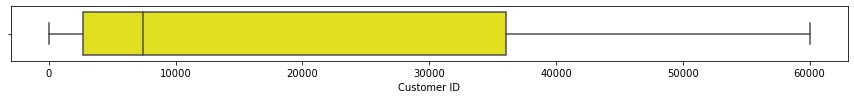

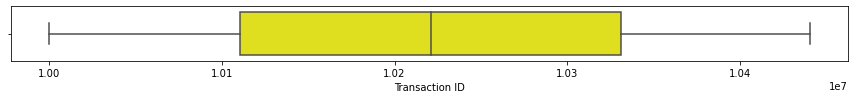

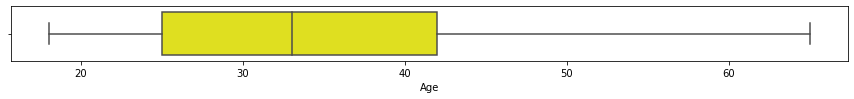

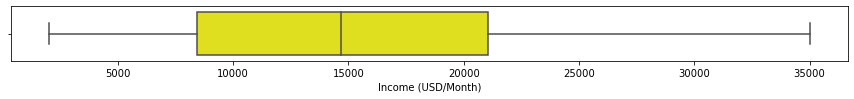

<Figure size 1080x72 with 0 Axes>

In [47]:
#Plot the boxplot for each numerical column to find the outliers
df5=df4.select_dtypes(exclude=['object'])
for c in df5:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=df5, x=c, color="yellow")

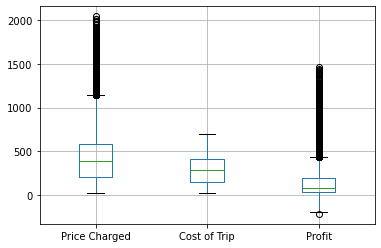

In [32]:
#Plot the boxplot for Price charged, Cost of Trip and Profit to find the outliers
boxplot = df4.boxplot(column=['Price Charged','Cost of Trip', 'Profit'])

## Which company has more profit over the years?

In [36]:
#Extract the year from Date of Travel
df4['Year'] = pd.DatetimeIndex(df4['Date of Travel']).year
df4['Year'].head(2)

0    2016
1    2018
Name: Year, dtype: int64

In [46]:
#Calculate the total profit based on each year and company
Tprofit = df4.groupby(['Year','Company'])['Profit'].sum().reset_index(name='Total profit')
Tprofit.head(6)

,Year,Company,Total profit
0,2016,Pink Cab,1.713511e+06
1,2016,Yellow Cab,1.392700e+07
2,2017,Pink Cab,2.033655e+06
3,2017,Yellow Cab,1.657598e+07
4,2018,Pink Cab,1.560162e+06
5,2018,Yellow Cab,1.351740e+07


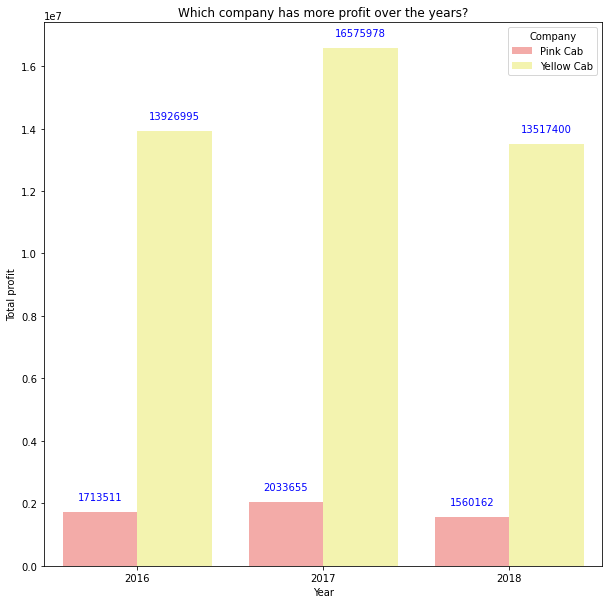

In [63]:
#Plot Total Profit for each year and company
fig_dim = (10, 10)
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x="Year", y='Total profit', data=Tprofit, hue='Company', palette=['r','y'])
ax.set_title('Which company has more profit over the years?')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='blue', xytext=(0, 15),
        textcoords='offset points')

## Which city earn more profit? 
***The allocation of profit with each city***

In [73]:
#Calculate the total profit based on each city and company
Tprofit1 = df4.groupby(['Company','City'])['Profit'].sum().reset_index(name='Total profit')

#List the first 5 city which has more profit
a=Tprofit1.sort_values(by = ['Total profit'],ascending=False)  #sort the column by descending order
a.head()

,Company,City,Total profit
28,Yellow Cab,NEW YORK NY,2.645108e+07
37,Yellow Cab,WASHINGTON DC,3.299104e+06
25,Yellow Cab,LOS ANGELES CA,3.285977e+06
22,Yellow Cab,CHICAGO IL,3.068591e+06
9,Pink Cab,NEW YORK NY,1.511474e+06


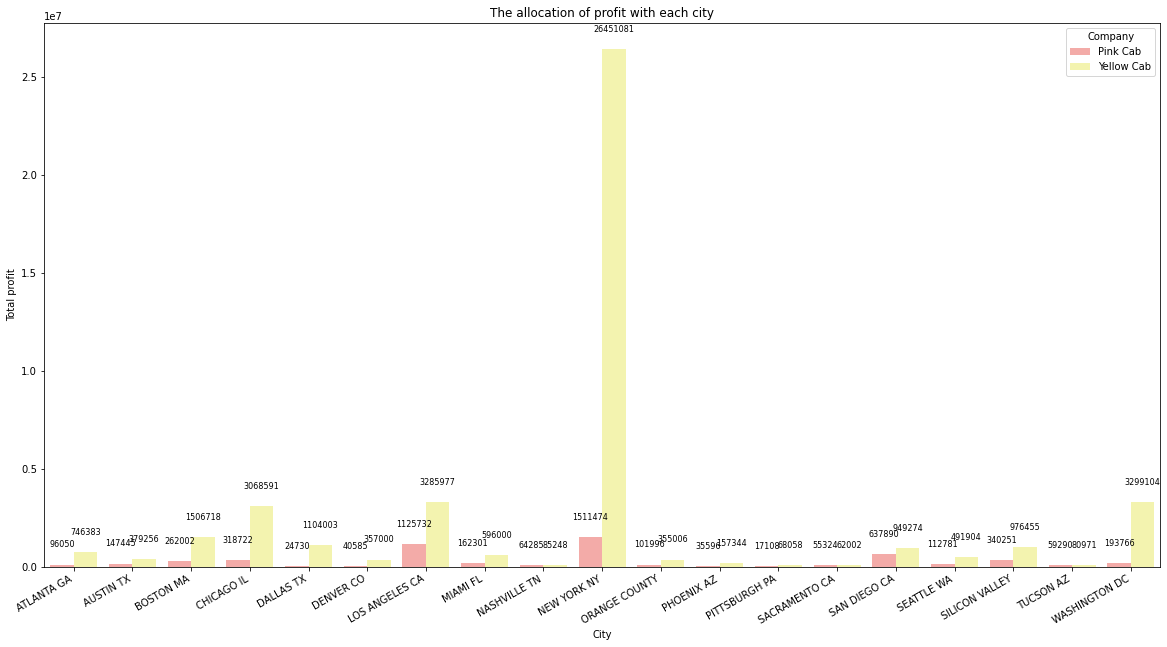

In [82]:
#Plot total profit for each city and company
fig_dim = (20, 10)
width = 0.35
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x="City", y='Total profit', data=Tprofit1, hue='Company', palette=['r','y'])
plt.xticks(rotation=30, ha='right')
ax.set_title('The allocation of profit with each city')

for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=8, color='black', xytext=(0, 20),
        textcoords='offset points')
    

## Which age group often take the ride?

In [83]:
# find out the statistics for each column
df4.describe()

,Customer ID,Transaction ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Year
count,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,1.022076e+07,35.336705,15048.822937,22.567254,423.443311,286.190113,137.253198,6.083579,2017.045199
std,21012.412463,1.268058e+05,12.594234,7969.409482,12.233526,274.378911,157.993661,160.311840,5.543493,0.800239
min,1.000000,1.000001e+07,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000,-4.998235,2016.000000
25%,2705.000000,1.011081e+07,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000,2.000385,2016.000000
50%,7459.000000,1.022104e+07,33.000000,14685.000000,22.440000,386.360000,282.480000,81.962000,4.466809,2017.000000
75%,36078.000000,1.033094e+07,42.000000,21035.000000,32.960000,583.660000,413.683200,190.030000,9.170006,2018.000000
max,60000.000000,1.044011e+07,65.000000,35000.000000,48.000000,2048.030000,691.200000,1463.966000,41.115556,2018.000000


In [87]:
# Defining new features for our analysis
# As the min wage is 18 and max wage is 65, I divided into 5 groups as below
# Age Group
def age_group(age):
    
    age_dict = {0:'<20', 
                1:'21-30', 
                2:'31-40', 
                3:'41-50',
                4:'50>'}
    
    if (age <= 20):
        return age_dict[0]
    elif (age > 20 and age <= 30):
        return age_dict[1]
    elif (age > 30 and age <= 40):
        return age_dict[2]
    elif (age > 40 and age <= 50):
        return age_dict[3]
    elif (age > 50):
        return age_dict[4]
    
df4['Age Group'] = df4['Age'].apply(age_group)
df4['Age Group'] = df4['Age Group'].astype('category')
df4.head(2)

,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Year,Age Group
0,29290,10000011,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016-01-08,30.45,370.95,313.6350,57.3150,1.882266,2016,21-30
1,29290,10351127,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018-07-21,26.19,598.70,317.4228,281.2772,10.739870,2018,21-30


In [111]:
#Calculate the total users based on age group and company
AgeGroup = df4.groupby(['Age Group','Company'])['Users'].count().reset_index()
AgeGroup.head(10)

,Age Group,Company,Users
0,21-30,Pink Cab,27203
1,21-30,Yellow Cab,88163
2,31-40,Pink Cab,26556
3,31-40,Yellow Cab,86550
4,41-50,Pink Cab,9119
5,41-50,Yellow Cab,30451
6,50>,Pink Cab,13483
7,50>,Yellow Cab,43201
8,<20,Pink Cab,8350
9,<20,Yellow Cab,26316


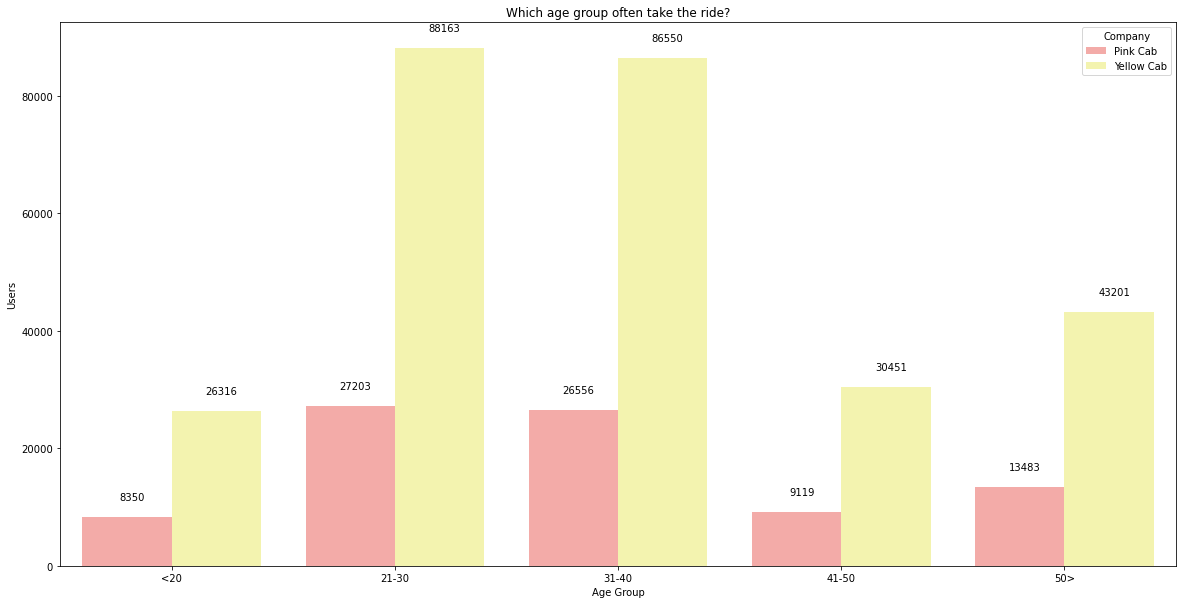

In [118]:
fig_dim = (20, 10)
width = 0.35
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x = 'Age Group', y = 'Users', data = AgeGroup, hue = 'Company', palette = ['r','y'], order = ['<20','21-30','31-40', '41-50','50>'])
ax.set_title('Which age group often take the ride?')


for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(5,20),
        textcoords='offset points')


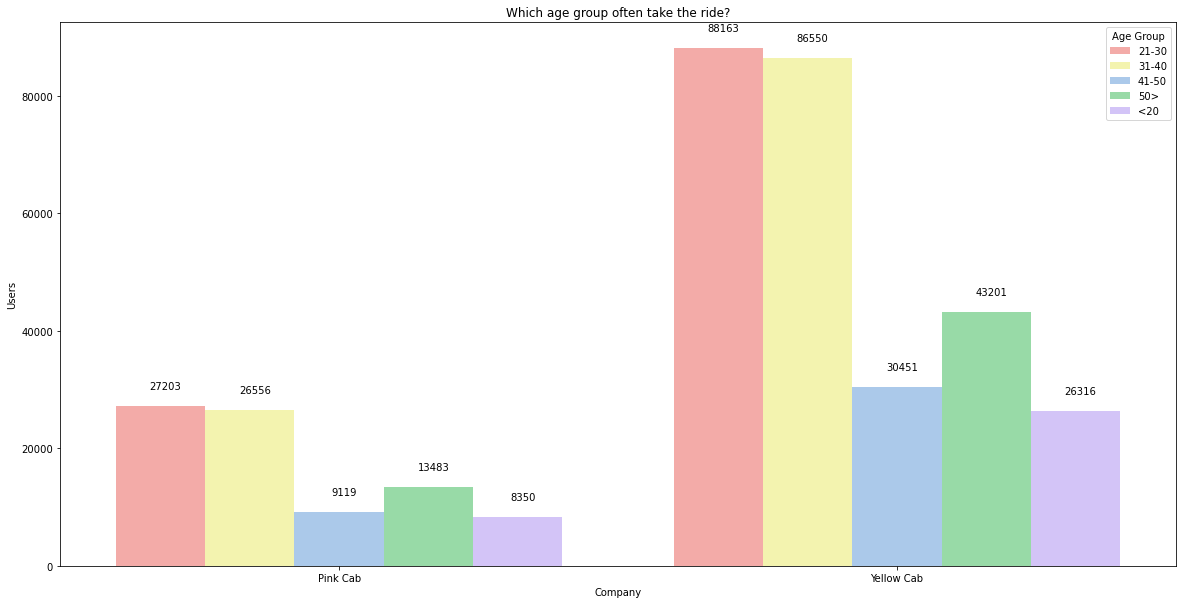

In [129]:
width = 0.35
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x = 'Company', y = 'Users', data = AgeGroup, hue = 'Age Group', palette = ['r','y','b','g','m'])
ax.set_title('Which age group often take the ride?')


for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(5,20),
        textcoords='offset points')

## Which income class contribute more profit?

In [136]:
# Defining new features for our analysis
# As the mean of income is 15000 , I divided into 3 groups as below:
# Greater 15000 is the higher class and less than 2500 is lower class. 
# Income class
def income_class(income):
    
    income_dict = {0:'Lower class', 
                   1:'Middle class', 
                   2:'Higher class'} 
    
    if (income <= 2500):
        return income_dict[0]
    elif (income > 2500 and income <= 15000):
        return income_dict[1]
    elif (income > 15000):
        return income_dict[2]

df4['Income class'] = (df4['Income (USD/Month)']).apply(income_class)
df4['Income class'] = df4['Income Group'].astype('category')

In [137]:
df4.head(2)

,Customer ID,Transaction ID,Gender,Age,Income (USD/Month),Company,City,Population,Users,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit,Profit per KM,Year,Age Group,Income Group,Income class
0,29290,10000011,Male,28,10813,Pink Cab,ATLANTA GA,"814,885","24,701",2016-01-08,30.45,370.95,313.6350,57.3150,1.882266,2016,21-30,Middle class,Middle class
1,29290,10351127,Male,28,10813,Yellow Cab,ATLANTA GA,"814,885","24,701",2018-07-21,26.19,598.70,317.4228,281.2772,10.739870,2018,21-30,Middle class,Middle class


In [138]:
#Calculate the total profit based on Income class and company
IncomeClass= df4.groupby(['Income class','Company'])['Profit'].sum().reset_index()
IncomeClass.head()

,Income class,Company,Profit
0,Higher class,Pink Cab,2.620362e+06
1,Higher class,Yellow Cab,2.176099e+07
2,Lower class,Pink Cab,1.071934e+05
3,Lower class,Yellow Cab,8.425361e+05
4,Middle class,Pink Cab,2.579772e+06


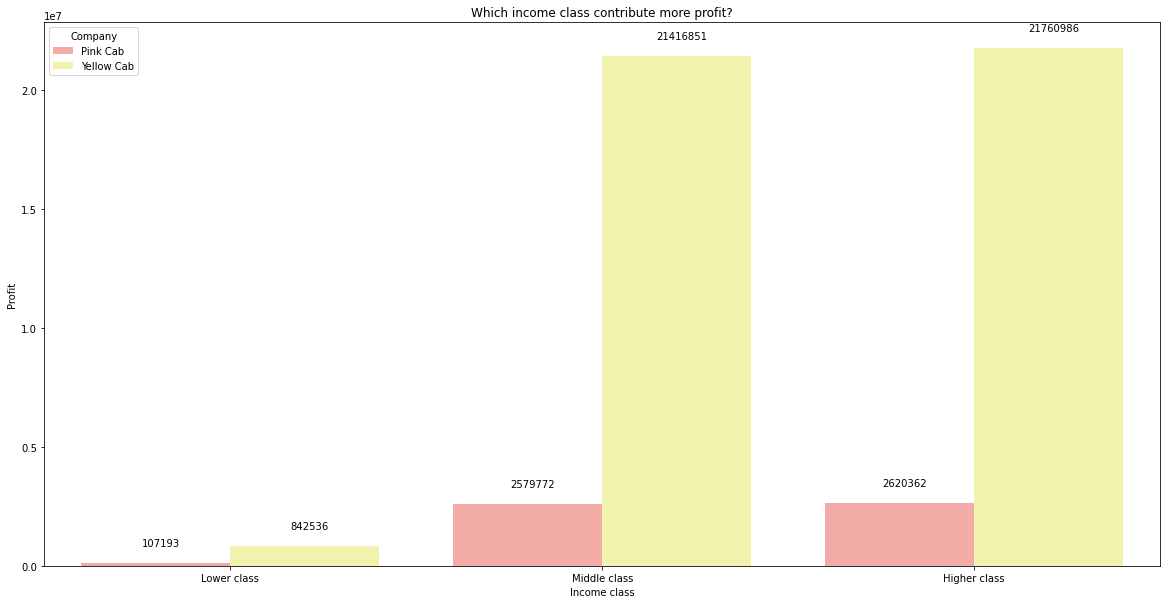

In [144]:
fig_dim = (20, 10)
width = 0.35
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x = 'Income class', y = 'Profit', data = IncomeClass, hue = 'Company', palette = ['r','y','g'],order=['Lower class','Middle class','Higher class'])
ax.set_title('Which income class contribute more profit?')


for c in chart.patches:
    chart.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(5,20),
        textcoords='offset points')

## Which city has more customers?

In [156]:
#Calculate the total cusomter based on City and company
Customer= df4.groupby(['Company','City'])['Users'].count().reset_index()
#List the first 5 city which has more cusomters:
b=Customer.sort_values(by = ['Users'],ascending=False)  #sort the column by descending order
b.head(10)

,Company,City,Users
28,Yellow Cab,NEW YORK NY,85918
22,Yellow Cab,CHICAGO IL,47264
37,Yellow Cab,WASHINGTON DC,40045
25,Yellow Cab,LOS ANGELES CA,28168
21,Yellow Cab,BOSTON MA,24506
6,Pink Cab,LOS ANGELES CA,19865
9,Pink Cab,NEW YORK NY,13967
14,Pink Cab,SAN DIEGO CA,10672
33,Yellow Cab,SAN DIEGO CA,9816
3,Pink Cab,CHICAGO IL,9361


Text(0.5, 1.0, 'Which city has more customer?')

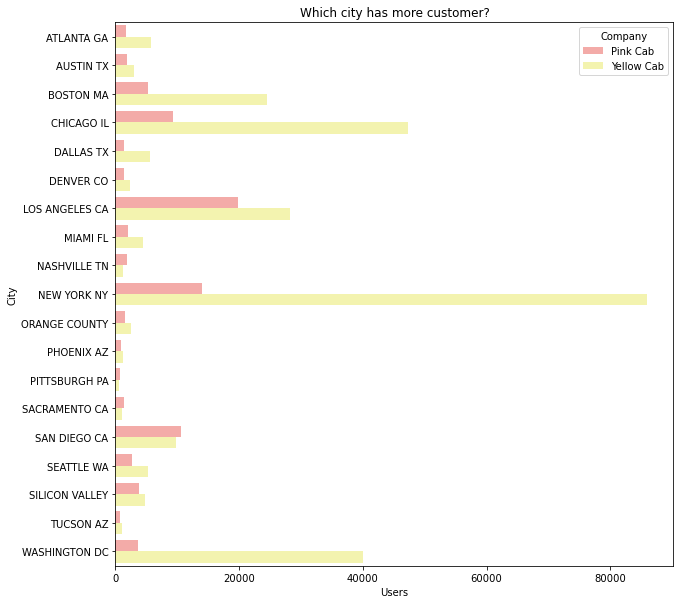

In [157]:
fig_dim = (10, 10)
width = 0.5
fig, ax = plt.subplots(figsize=fig_dim)
palette = sns.set_color_codes('pastel')
chart = sns.barplot(x = 'Users', y = 'City', data = Customer, hue = 'Company', palette = ['r','y','g'])
ax.set_title('Which city has more customer?')


## Conclusion: 

For exploration, I find out which company should be invested since it has more profit and more customers. 

After did analysis, we gained the below result:

-Yellow cab generate greater profit than pink cab over the years.

-Yellow cab generate more profit per year than pink cab

-Yellow cab has more customers than pink cab.

In additional, I also found which city should be invested more in the future.

After analyzed, New York City has more ride and more profit. 

-Top 5 city which has more customer are New York, Chicago, Washington , Los Angeles and Boston. 

-The age of customers are between 21 and 40 , they often take the ride no matter which company is. 

-Middle class and higher class are willing to spend money to take the cab. 

